In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

os.chdir('C:/Users/kyleg/Entity-Matching-in-Online-Retail')
from utility_functions import *

from IPython.display import display, HTML


import warnings
warnings.filterwarnings('ignore')

# Training & Testing Offer Pairs

In [2]:
os.chdir('D:/Documents/Large-Scale Product Matching/')
train_test_df_features = pd.read_csv('train_test_df_features.csv')
train_test_offers_df = pd.read_csv('train_test_offers_df.csv')


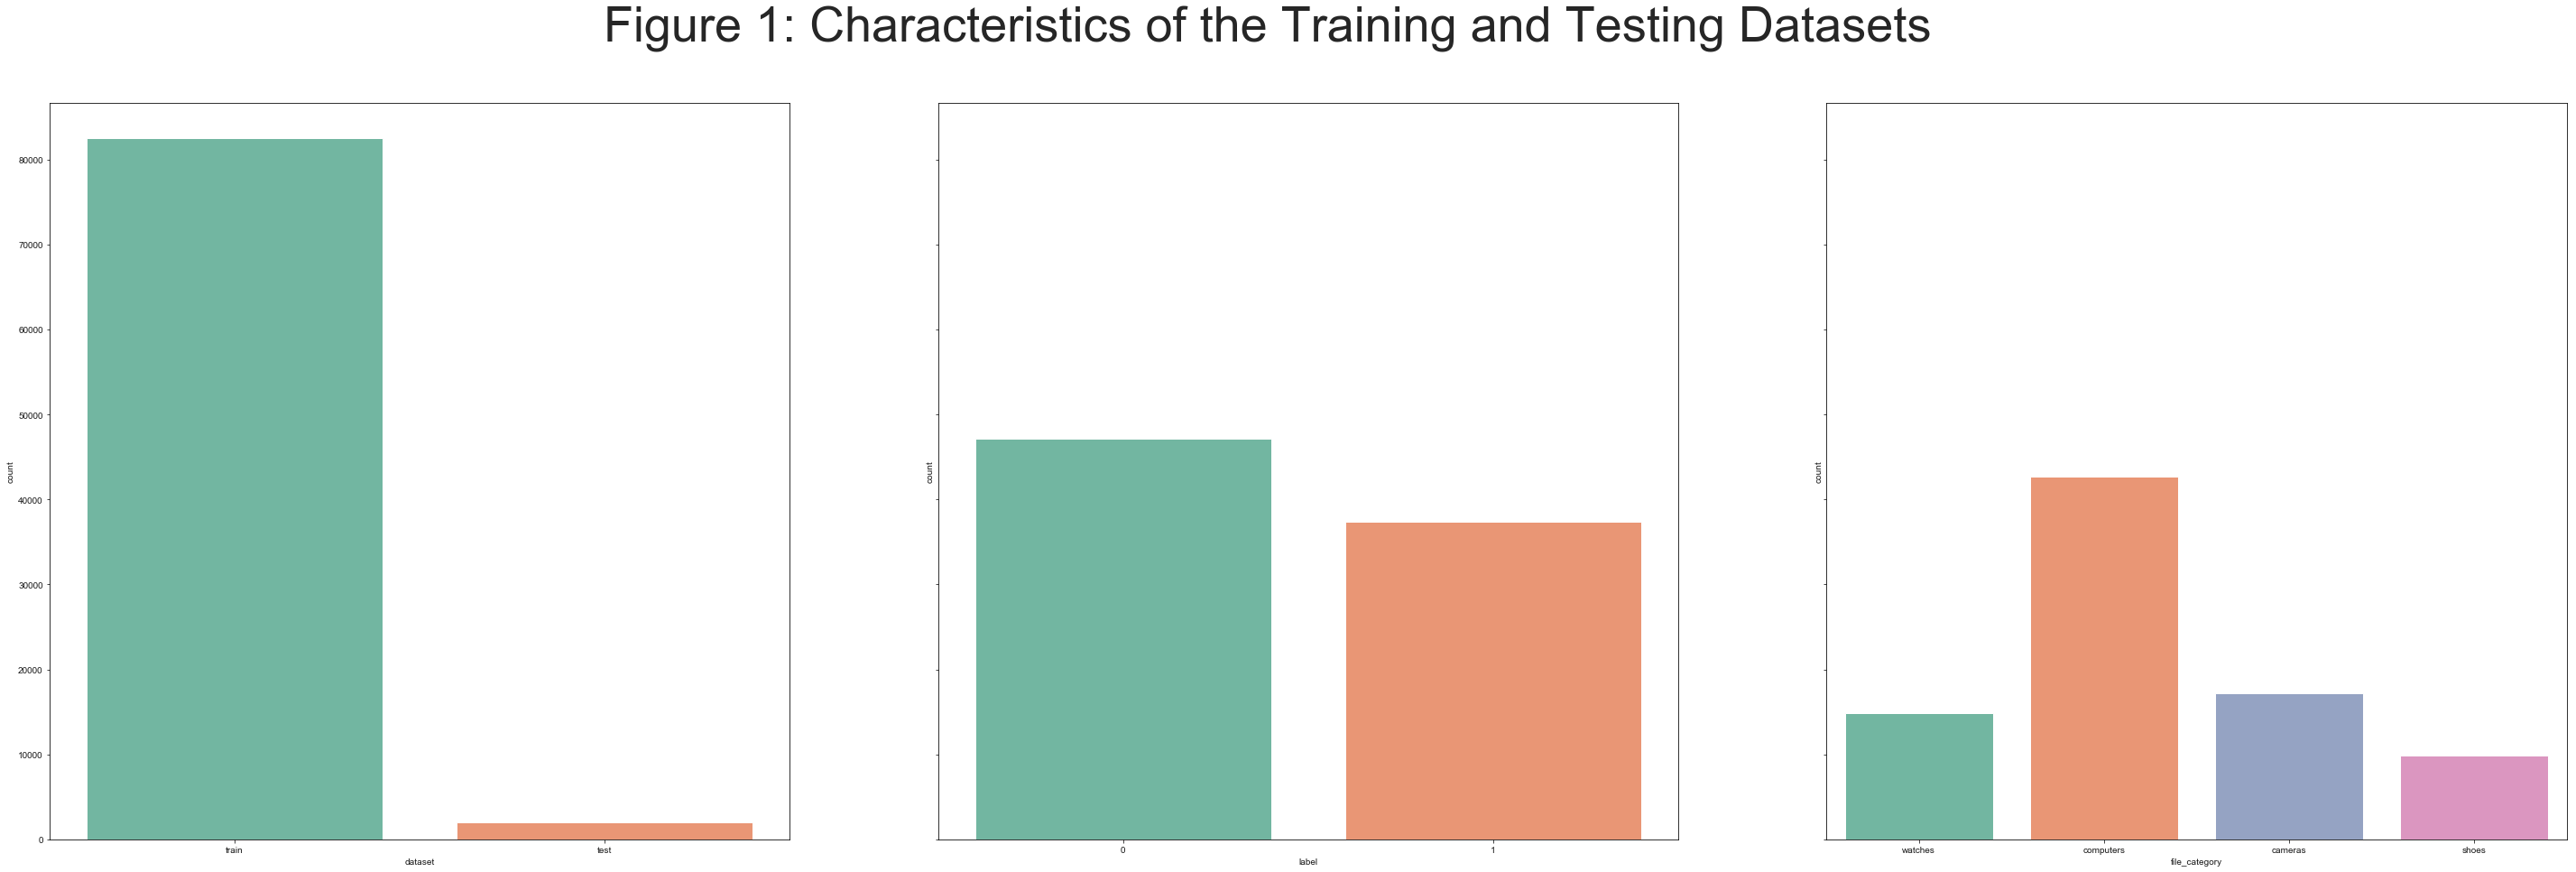

In [25]:
test_train_characteristics = train_test_df_features[['label', 'dataset', 'file_category']]

os.chdir('c:/users/kyleg/Entity-Matching-in-Online-Retail/')
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(50, 15), sharey=True) 

sns.set(font_scale=2)
plt.rcParams.update({'font.size': 45})
st = fig.suptitle("Figure 1: Characteristics of the Training and Testing Datasets")

sns.countplot(x='dataset', data=test_train_characteristics, palette=sns.color_palette("Set2"), ax=axes[0])

# mosaic plot: https://www.statsmodels.org/dev/generated/statsmodels.graphics.mosaicplot.mosaic.html
sns.countplot(x='label', data=test_train_characteristics, palette=sns.color_palette("Set2"), ax=axes[1])

sns.countplot(x='file_category', data=test_train_characteristics, palette=sns.color_palette("Set2"), ax=axes[2])

plt.savefig('plots/test_train_characteristics.png')

,label,name_1,name_2,description_1,description_2
1,1,cartier santos 100 w20073x8,cartier santos 100 watch w20073x8,this cartier has undergone a thorough inspecti...,p this fine watch model number w20073x8 from c...
2,1,cartier santos 100 w20073x8,cartier santos 100 watch w20073x8,this cartier has undergone a thorough inspecti...,p this fine watch model number w20073x8 from c...
3,1,cartier santos 100 watch w20073x8,cartier santos 100 watch w20073x8,p this fine watch model number w20073x8 from c...,p this fine watch model number w20073x8 from c...
4,1,"""Cartier Santos 100 Watch W20073X8""",cartier santos 100 watch w20073x8,"""<p>This fine watch, model number W20073X8 fro...",p this fine watch model number w20073x8 from c...


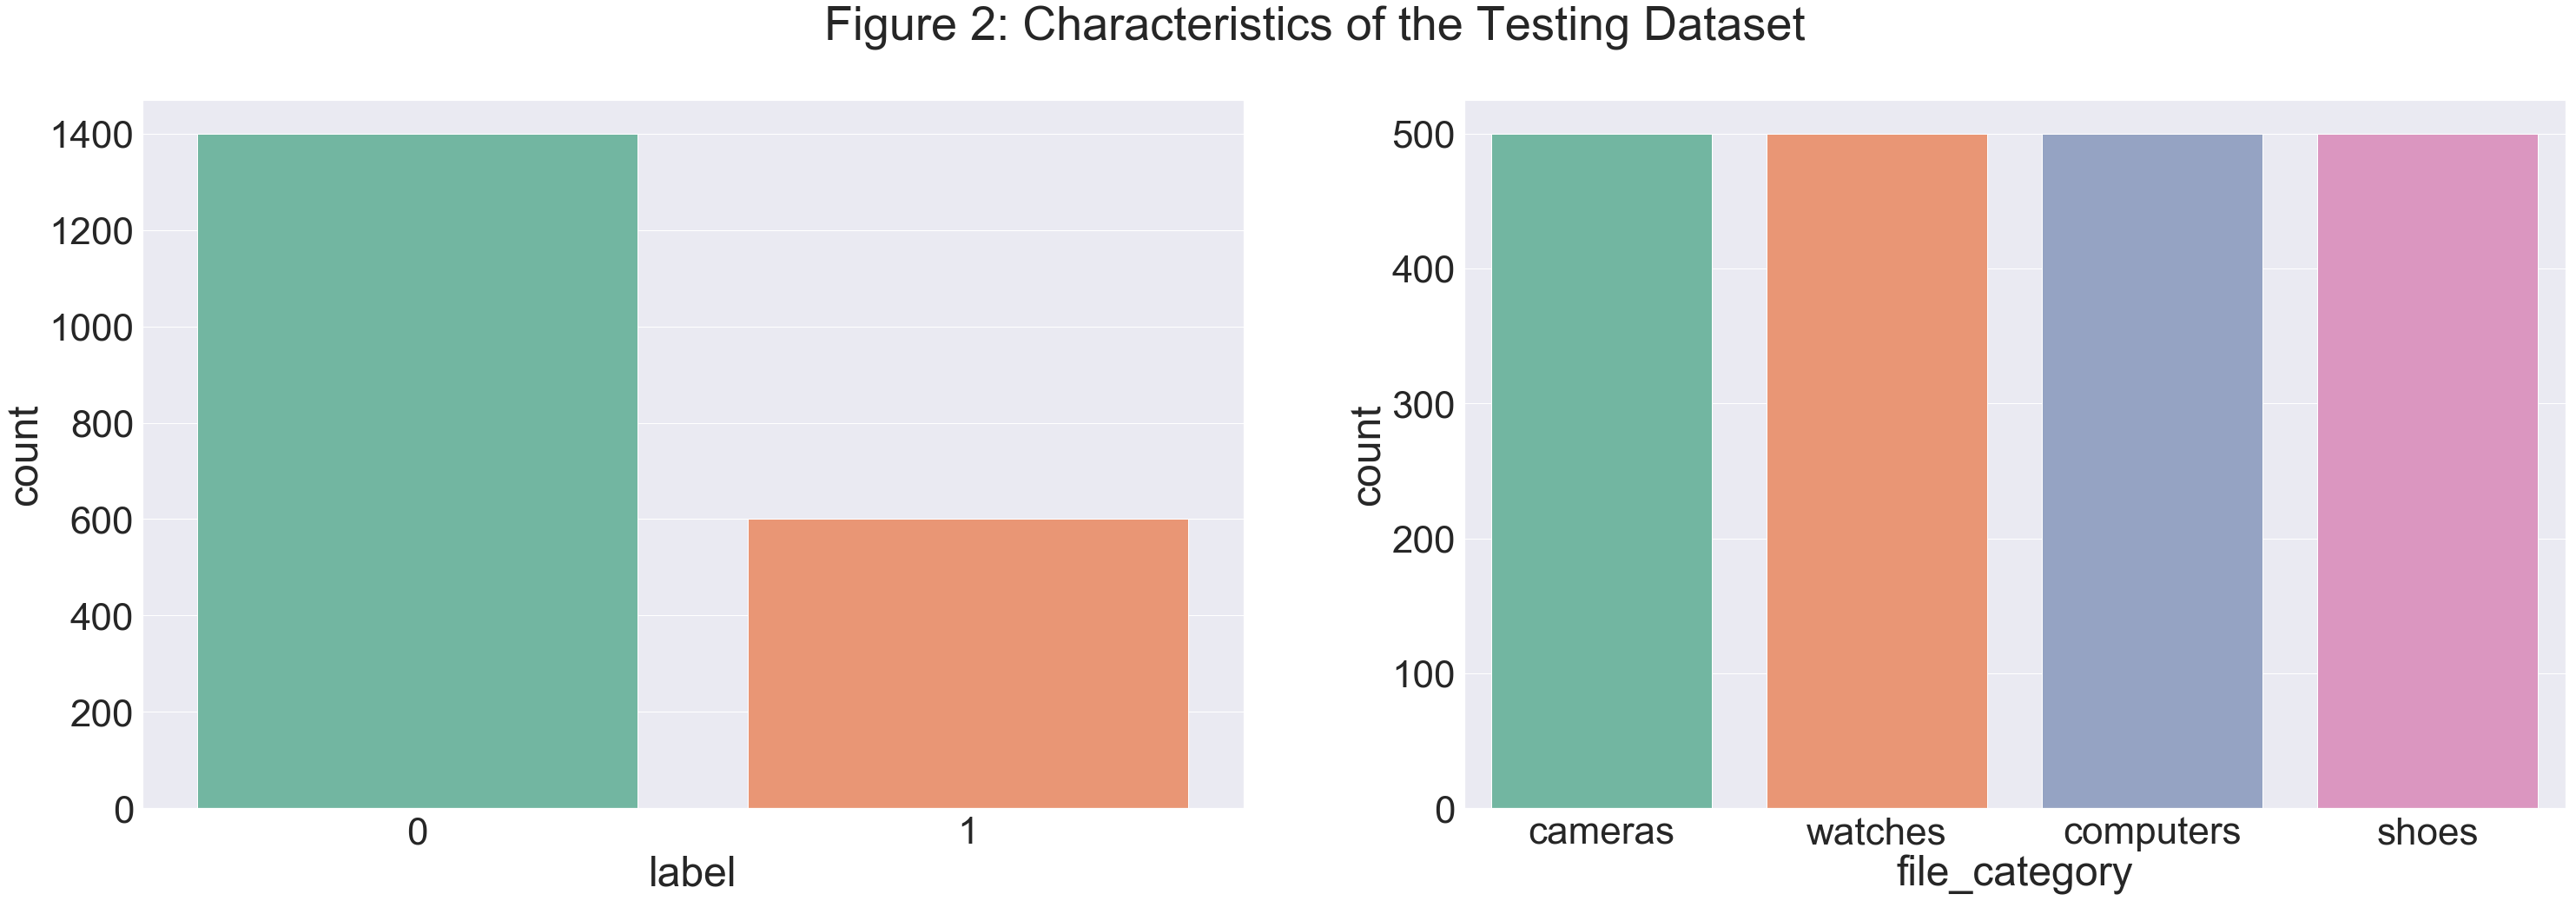

In [77]:
test_characteristics = test_train_characteristics[test_train_characteristics.dataset == 'test']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(50, 15)) #

sns.set(font_scale=4)
plt.rcParams.update({'font.size': 45})
st = fig.suptitle("Figure 2: Characteristics of the Testing Dataset")

sns.countplot(x='label', data=test_characteristics, palette=sns.color_palette("Set2"), ax=axes[0])

sns.countplot(x='file_category', data=test_characteristics, palette=sns.color_palette("Set2"), ax=axes[1])

plt.savefig('plots/test_characteristics.png')

,name_1,name_2
25,sandisk ultra sdxc 64gb 80mb s uhs i clase 10 tarjeta sd,sandisk ultra sdxc 64gb 80mb s uhs i clase 10 tarjeta sd
74,"""Hamilton Jazzmaster Seaview Chrono Quartz Watch H37512131""",herren hamilton jazzmaster seaview chronograf uhr h37512131
160,nikon sb 700 speedlight,nikon sb 700 speedlight flash
383,nike free run distance black white dark grey wolf grey,nike free rn distance mens running shoes black
495,"lumix g vario lens 14 45mm f3 5 5 6 asph micro four thirds mega optical i s h fs014045 , lumix g vario lens 14 45mm f3 5 5 6 asph micro four thirds mega optical i s h fs014045 h fs014045",panasonic h fs014045 lens
499,panasonic lumix g vario 14 45mm f 3 5 5 6 asph mega ois prijzen,panasonic h fs014045 lens
538,nike wmns air pegasus 89 black summit white wolf grey 84488 001,sneakers buty nike wmns air pegasus 89 black summit white wolf grey 84488 001
618,"""NP-FM500H Rechargeable M Series Info-Lithium Battery for Sony Alpha DSLR Cameras""",sony np fm500h pack baterias recargables
630,nike free run flyknit noir blanc,nike free rn flyknit black white
639,nike free rn flyknit 831069 001,nike free rn flyknit black white


In [18]:
test_matches = train_test_df_features[(train_test_df_features.label == 1) &
                                      (train_test_df_features.dataset == 'test')][['file_category', 
                                                                                   'name_1', 
                                                                                   'name_2']]\
.sample(4, random_state=1)

pd.set_option('display.max_colwidth', 0)
h = HTML(test_matches.to_html(index=False))
display(h)

my_file = open('plots/table_1_matched_offer_pairs.html', 'w')
my_file.write(h.data)
my_file.close()

# ax = test_matches.plot()
# ax.get_figure()
# fig.savefig('/plots/test_matches.png')

file_category,name_1,name_2
shoes,nike sportswear air force 1 07 white,sneakers buty nike air force 1 07 low white 315122 111
computers,323146 b21 bl20p g2 1p xeon 3 06ghz,323146 b21 bl20p xeon 3 06ghz
watches,daniel wellington dapper sheffield rose gold,daniel wellington men s dapper 38mm sheffield rose watch
cameras,canon eos rebel t5i,canon eos rebel t5i 18 135mm is stm digital slr camera kit black


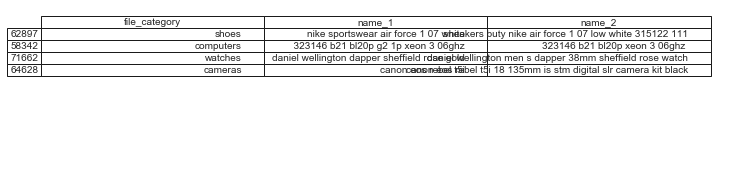

In [107]:
# from pandas.tools.plotting import table

# fig, ax = plt.subplots(figsize=(12, 3)) 
# # st = fig.set_title("Table 1: Matched Offer Pairs")
# # no axes
# ax.xaxis.set_visible(False)  
# ax.yaxis.set_visible(False)  
# # no frame
# ax.set_frame_on(False)  
# # plot table
# tab = table(ax, test_matches, loc='upper right')  
# # set font manually
# tab.auto_set_font_size(False)
# tab.set_fontsize(10) 
# # save the result
# plt.savefig('plots/test_matches.png')

# source: https://stackoverflow.com/a/44751285

# Offer Features




In [3]:
possible_features = ['brand', 'category', 'description', 'gtin', 'identifier', 'manufacturer','mpn', 'name', 'price', 'productID', 'sku']
train_test_offer_features = train_test_offers_df[possible_features]

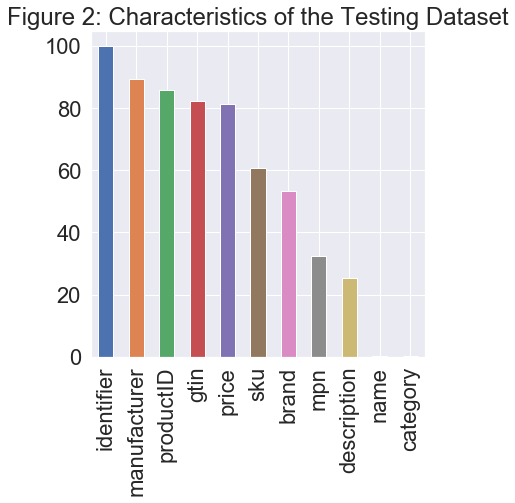

In [32]:
feature_nulls = calculate_percent_nulls(train_test_offer_features, print_series=False, return_series=True)

plt.figure(figsize=(6, 6))

plot = feature_nulls.plot.bar()
fig = plot.get_figure()
plt.title("Figure 2: Characteristics of the Testing Dataset")
fig.savefig("plots/feature_sparsity.png")

In [44]:
# train_test_offer_features[['brand', 'manufacturer']]

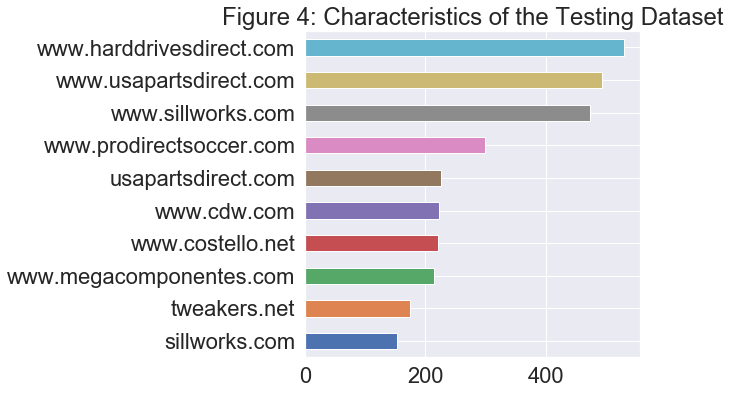

In [49]:
plt.figure(figsize=(6, 6))

# plot = train_test_offers_df.domain.value_counts()[:15].plot.barh()
plot = train_test_offers_df.domain.value_counts(ascending=True)[-10:].plot.barh()
fig = plot.get_figure()
plt.title("Figure 4: Characteristics of the Testing Dataset")
fig.savefig("plots/domains.png")

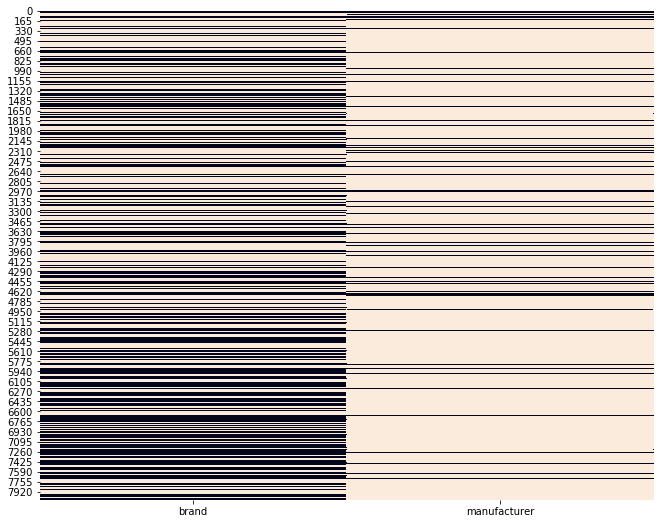

In [13]:
plt.figure(figsize=(11, 9))

offer_categories = train_test_offers_df.category.value_counts()
offer_categories_df = pd.DataFrame({'category': offer_categories.index, 'n': offer_categories})

sns.barplot(x='n', y='category', data=offer_categories_df)

sns.heatmap(train_test_offers_df[['brand', 'manufacturer']].isnull(), cbar=False)

,label,brand_1,brand_2,category_1,category_2,cluster_id_1,cluster_id_2,dataset,description_1,description_2,...,priceCurrency_1,priceCurrency_2,price_1,price_2,productID_1,productID_2,relationToParent_1,relationToParent_2,sku_1,sku_2
0,1,NaN,NaN,Jewelry,Jewelry,11213997,11213997,train,p this fine watch model number w20073x8 from c...,p this fine watch model number w20073x8 from c...,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.w3.org/1999/xhtml/microdata#item,http://www.w3.org/1999/xhtml/microdata#item,NaN,NaN
1,1,cartier,NaN,Jewelry,Jewelry,11213997,11213997,train,this cartier has undergone a thorough inspecti...,p this fine watch model number w20073x8 from c...,...,NaN,NaN,NaN,NaN,w20073x8,NaN,http://www.w3.org/1999/xhtml/microdata#item,http://www.w3.org/1999/xhtml/microdata#item,NaN,NaN
2,1,cartier,NaN,Jewelry,Jewelry,11213997,11213997,train,this cartier has undergone a thorough inspecti...,p this fine watch model number w20073x8 from c...,...,NaN,NaN,NaN,NaN,w20073x8,NaN,http://www.w3.org/1999/xhtml/microdata#item,http://www.w3.org/1999/xhtml/microdata#item,NaN,NaN
3,1,NaN,NaN,Jewelry,Jewelry,11213997,11213997,train,p this fine watch model number w20073x8 from c...,p this fine watch model number w20073x8 from c...,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.w3.org/1999/xhtml/microdata#item,http://www.w3.org/1999/xhtml/microdata#item,NaN,NaN
4,1,NaN,NaN,Jewelry,Jewelry,11213997,11213997,train,"""<p>This fine watch, model number W20073X8 fro...",p this fine watch model number w20073x8 from c...,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.w3.org/1999/xhtml/microdata#item,http://www.w3.org/1999/xhtml/microdata#item,NaN,NaN
5,1,NaN,NaN,Jewelry,Jewelry,11213997,11213997,train,NaN,p this fine watch model number w20073x8 from c...,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.w3.org/1999/xhtml/microdata#item,http://www.w3.org/1999/xhtml/microdata#item,NaN,NaN
6,1,cartier,NaN,Jewelry,Jewelry,11213997,11213997,train,this cartier has undergone a thorough inspecti...,p this fine watch model number w20073x8 from c...,...,NaN,NaN,NaN,NaN,w20073x8,NaN,http://www.w3.org/1999/xhtml/microdata#item,http://www.w3.org/1999/xhtml/microdata#item,NaN,NaN
7,1,cartier,NaN,Jewelry,Jewelry,11213997,11213997,train,this cartier has undergone a thorough inspecti...,p this fine watch model number w20073x8 from c...,...,NaN,NaN,NaN,NaN,w20073x8,NaN,http://www.w3.org/1999/xhtml/microdata#item,http://www.w3.org/1999/xhtml/microdata#item,NaN,NaN
8,1,NaN,NaN,Jewelry,Jewelry,11213997,11213997,train,"""<p>This fine watch, model number W20073X8 fro...",p this fine watch model number w20073x8 from c...,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.w3.org/1999/xhtml/microdata#item,http://www.w3.org/1999/xhtml/microdata#item,NaN,NaN
9,1,NaN,NaN,Jewelry,Jewelry,11213997,11213997,train,p this fine watch model number w20073x8 from c...,p this fine watch model number w20073x8 from c...,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.w3.org/1999/xhtml/microdata#item,http://www.w3.org/1999/xhtml/microdata#item,NaN,NaN
